In [4]:
#A1. Evaluate the intraclass spread and interclass distances between the classes in your dataset. If 
#your data deals with multiple classes, you can take any two classes. Steps below (refer below 
#diagram for understanding): 
#• Calculate the mean for each class (also called as class centroid) 
#(Suggestion: You may use numpy.mean() function for finding the average vector for all 
#vectors in a given class. Please define the axis property appropriately to use this function. EX: 
#feat_vecs.mean(axis=0)) 
#• Calculate spread (standard deviation) for each class 
#(Suggestion: You may use numpy.std() function for finding the standard deviation vector 
#for all vectors in a given class. Please define the axis property appropriately to use this 
#function.) 
#• Calculate the distance between mean vectors between classes 
#(Suggestion: numpy.linalg.norm(centroid1 – centroid2) gives the Euclidean 
#distance between two centroids.)
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler
from sklearn.compose import ColumnTransformer

def load_data(path):
    df = pd.read_csv(path)

    # 1. Drop the irrelevant 'Timestamp' and 'Country' columns
    df = df.drop(columns=['Timestamp', 'Country'])

    # 2. Handle missing values in 'self_employed' by filling with a new category
    df['self_employed'].fillna('Unknown', inplace=True)

    # 3. Separate features (X) and the target variable (y)
    X = df.drop(columns=['treatment'])
    y = df['treatment']

    # 4. Identify categorical and numerical columns
    categorical_cols = X.select_dtypes(include=['object']).columns

    # 5. Use One-Hot Encoding for categorical features
    preprocessor = ColumnTransformer(
        transformers=[
            ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],
        remainder='passthrough'
    )
    
    # Apply the preprocessing
    X_processed = preprocessor.fit_transform(X)
    
    # 6. Encode the target variable 'y'
    y_encoded = pd.Series(y).map({'Yes': 1, 'No': 0}).values

    # 7. Scale the processed feature data
    scaler = MaxAbsScaler()
    X_scaled = scaler.fit_transform(X_processed)

    return X_scaled, y_encoded

def class_spread_distance(X_scaled, y_encoded):
    # Separate the data into two classes
    X1 = X_scaled[y_encoded == 0] # Class 'No' treatment
    X2 = X_scaled[y_encoded == 1] # Class 'Yes' treatment
    
    # Calculate Inter-class distance (between classes)
    mean1 = np.mean(X1, axis=0)
    mean2 = np.mean(X2, axis=0)
    distance_inter = np.linalg.norm(mean1 - mean2)
    
    # Calculate Intra-class distance (within each class)
    distance_intra1 = np.mean(np.linalg.norm(X1 - mean1, axis=1))
    distance_intra2 = np.mean(np.linalg.norm(X2 - mean2, axis=1))
    
    return mean1, mean2, distance_inter, distance_intra1, distance_intra2

if __name__ == "__main__":
    path = 'Mental Health Dataset.csv'
    
    # Load and preprocess the data
    X_scaled, y_encoded = load_data(path)
    
    # Calculate the distances
    mean1, mean2, distance_inter, distance_intra1, distance_intra2 = class_spread_distance(X_scaled, y_encoded)
    
    print("Mean 1 (No Treatment):", mean1)
    print("Mean 2 (Yes Treatment):", mean2)
    print("-" * 50)
    print("Inter-class distance (between 'No' and 'Yes'):", distance_inter)
    print("Intra-class distance for 'No' treatment:", distance_intra1)
    print("Intra-class distance for 'Yes' treatment:", distance_intra2)

Mean 1 (No Treatment): [0.11092997 0.88907003 0.17065033 0.212686   0.22742785 0.17927852
 0.20995731 0.89492809 0.01616491 0.088907   0.78590475 0.21409525
 0.21954572 0.18332666 0.20765692 0.19879385 0.19067685 0.34554222
 0.31844181 0.33601597 0.32555714 0.29894721 0.37549565 0.32306332
 0.35798367 0.31895301 0.31087746 0.3422816  0.34684093 0.53289628
 0.46710372 0.34709653 0.36281933 0.29008414 0.35470233 0.33216126
 0.31313641 0.2140538  0.75870073 0.02724547 0.48590061 0.32577129
 0.18832811]
Mean 2 (Yes Treatment): [0.24698183 0.75301817 0.17239137 0.20623145 0.22647453 0.18216739
 0.21273525 0.87019498 0.01938946 0.11041557 0.42725905 0.57274095
 0.21521483 0.18489086 0.20761351 0.20045933 0.19182147 0.3385025
 0.31590179 0.34559571 0.32545425 0.30080078 0.37374497 0.32933621
 0.35362384 0.31703996 0.31478395 0.34067721 0.34453884 0.5229259
 0.4770741  0.34510792 0.36124548 0.2936466  0.35260762 0.33386854
 0.31352384 0.13947942 0.82881455 0.03170603 0.32890262 0.20736284
 0.4

 Mean: 29.56431024339522
 Variance: 737.0537117859932


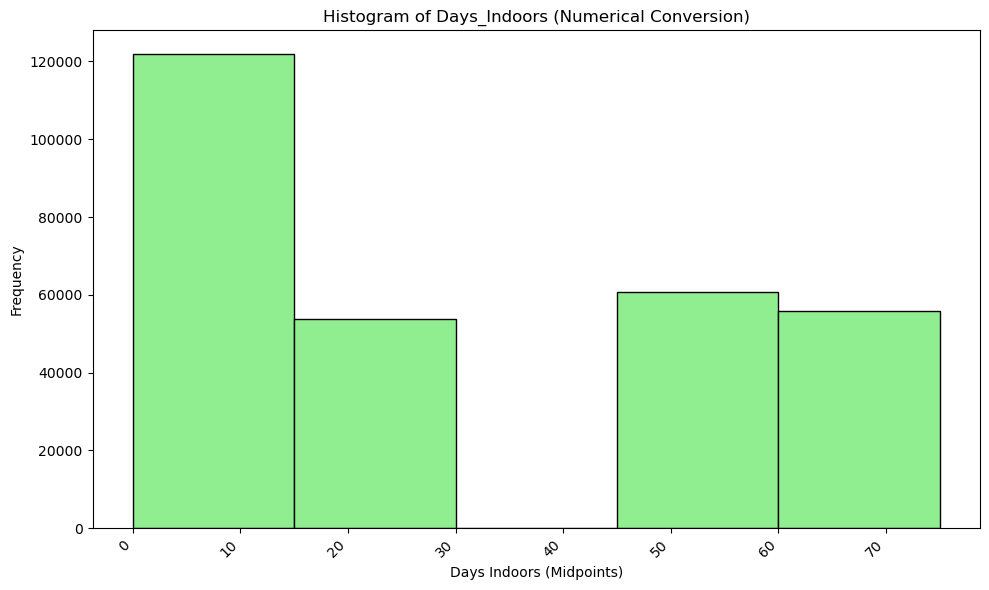

In [2]:
#A2. Take any feature from your dataset. Observe the density pattern for that feature by plotting the 
#histogram. Use buckets (data in ranges) for histogram generation and study. Calculate the mean and 
#variance from the available data.  
#(Suggestion: numpy.histogram()gives the histogram data. Plot of histogram may be 
#achieved with matplotlib.pyplot.hist()) 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_data(path):
    df = pd.read_csv(path)
    return df

def correct_processing_and_analysis(df):
    df = df.drop(columns=['Timestamp', 'Country'])
    mapping = {
        '1-14 days': 7.5,
        '15-30 days': 22.5,
        '31-60 days': 45.5,
        'More than 2 months': 75.0,
        'Go out Every day': 0.0
    }
    df['Days_Indoors_Num'] = df['Days_Indoors'].map(mapping)
    mean = df['Days_Indoors_Num'].mean()
    variance = df['Days_Indoors_Num'].var()
    return df['Days_Indoors_Num'], mean, variance

def plot_histogram(column):
    plt.figure(figsize=(10, 6))
    plt.hist(column, bins=5, edgecolor='black', color='lightgreen')
    plt.title('Histogram of Days_Indoors (Numerical Conversion)')
    plt.xlabel('Days Indoors (Midpoints)')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    path = 'Mental Health Dataset.csv'
    df = load_data(path)
    numerical_data, mean, variance = correct_processing_and_analysis(df)
    print(" Mean:", mean)
    print(" Variance:", variance)
    plot_histogram(numerical_data)

C:\Users\koppe\AppData\Local\Temp\ipykernel_11320\154660751.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df.dropna(inplace=True)


r=1, distance=129098.40666666666
r=2, distance=295.2532551330581
r=3, distance=40.83893000792792
r=4, distance=15.513567991866626
r=5, distance=8.769550869289507
r=6, distance=6.027435989245496
r=7, distance=4.624496577054967
r=8, distance=3.797291657591441
r=9, distance=3.2608440413249737
r=10, distance=2.8885846816470147


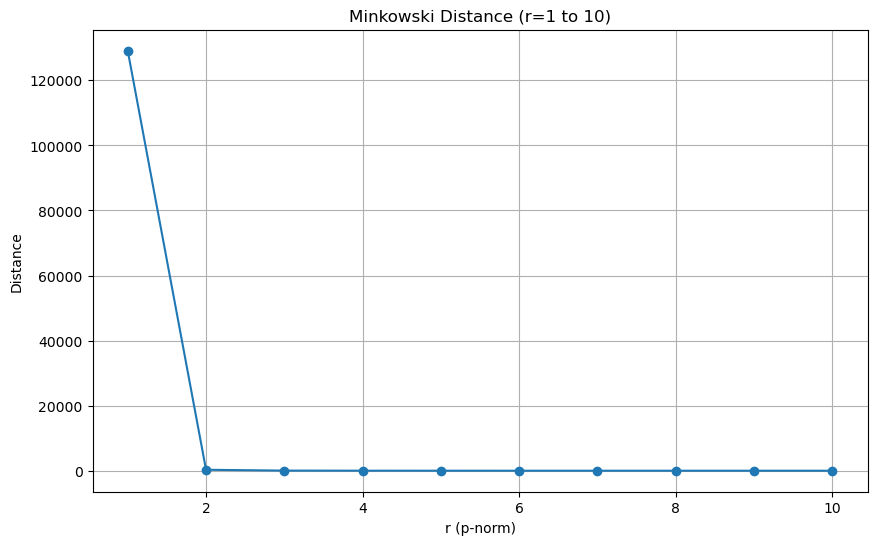

In [3]:
#A3. Take any two feature vectors from your dataset. Calculate the Minkwoski distance with r from 1 
#to 10. Make a plot of the distance and observe the nature of this graph. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_and_process_features(path):
    df = pd.read_csv(path)

    # Select the two features to be analyzed
    df = df[['Days_Indoors', 'Growing_Stress']]

    # Process 'Days_Indoors' by converting to numerical midpoints
    mapping = {
        '1-14 days': 7.5,
        '15-30 days': 22.5,
        '31-60 days': 45.5,
        'More than 2 months': 75.0,
        'Go out Every day': 0.0
    }
    df['Days_Indoors_Num'] = df['Days_Indoors'].map(mapping)
    
    # Process 'Growing_Stress' by converting to numerical values
    df['Growing_Stress_Num'] = df['Growing_Stress'].map({'Yes': 1.0, 'No': 0.0, 'Maybe': 0.5})

    # Drop original columns and keep only the processed numerical ones
    processed_df = df[['Days_Indoors_Num', 'Growing_Stress_Num']]

    # Handle any remaining missing values (if any) by dropping the rows
    processed_df.dropna(inplace=True)

    # Scale the features using Min-Max scaling
    processed_df = (processed_df - processed_df.min()) / (processed_df.max() - processed_df.min())
    
    return processed_df['Days_Indoors_Num'].values, processed_df['Growing_Stress_Num'].values

def minkowski_distances(f1, f2):
    r_vals = np.arange(1, 11)
    distances = [np.linalg.norm(f1 - f2, ord=r) for r in r_vals]
    return r_vals, distances

def plot_minkowski(r_vals, distances):
    plt.figure(figsize=(10, 6))
    plt.plot(r_vals, distances, marker='o')
    plt.title("Minkowski Distance (r=1 to 10)")
    plt.xlabel("r (p-norm)")
    plt.ylabel("Distance")
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    path = 'Mental Health Dataset.csv'
    f1, f2 = load_and_process_features(path)
    
    r_vals, distances = minkowski_distances(f1, f2)
    
    for r, d in zip(r_vals, distances):
        print(f"r={r}, distance={d}")
        
    plot_minkowski(r_vals, distances)

In [5]:
#A4. Divide dataset in your project into two parts – train & test set. To accomplish this, use the train
#test_split() function available in SciKit. See below sample code for help: 
#>>> import numpy as np 
#>>> from sklearn.model_selection import train_test_split 
#>>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 
#X is the feature vector set for your project and y is the class levels for vectors present in X. 
#Note: Before set split, make sure you have only two classes. If your project deals with multi-class 
#problem, take any two classes from them.  
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler
from sklearn.compose import ColumnTransformer

def load_and_preprocess_data(path):
    df = pd.read_csv(path)

    # 1. Drop irrelevant columns
    df = df.drop(columns=['Timestamp', 'Country'])

    # 2. Handle missing values in 'self_employed'
    df['self_employed'].fillna('Unknown', inplace=True)

    # 3. Separate features (X) and target (y)
    X = df.drop(columns=['treatment'])
    y = df['treatment']

    # 4. Identify categorical columns for one-hot encoding
    categorical_cols = X.select_dtypes(include=['object']).columns

    # 5. Use ColumnTransformer to apply OneHotEncoder to categorical columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],
        remainder='passthrough'
    )
    
    # Apply preprocessing to the features
    X_processed = preprocessor.fit_transform(X)
    
    # 6. Encode the target variable 'y' from 'Yes'/'No' to 1/0
    y_encoded = pd.Series(y).map({'Yes': 1, 'No': 0}).values

    # 7. Scale the processed feature data
    scaler = MaxAbsScaler()
    X_scaled = scaler.fit_transform(X_processed)

    return X_scaled, y_encoded

def split_data(X, y):
    # Perform a train-test split with a 70/30 ratio
    return train_test_split(X, y, test_size=0.3, random_state=42)

if __name__ == "__main__":
    path = 'Mental Health Dataset.csv'
    
    # Load, preprocess, and split the data
    X, y = load_and_preprocess_data(path)
    X_train, X_test, y_train, y_test = split_data(X, y)
    
    # Print the shapes to verify the split
    print("Shape of X_train:", X_train.shape)
    print("Shape of y_train:", y_train.shape)
    print("Shape of X_test:", X_test.shape)
    print("Shape of y_test:", y_test.shape)

Shape of X_train: (204654, 43)
Shape of y_train: (204654,)
Shape of X_test: (87710, 43)
Shape of y_test: (87710,)


In [6]:
#A5. Train a kNN classifier (k =3) using the training set obtained from above exercise. Following code 
#for help: 
#>>> import numpy as np 
#>>> from sklearn.neighbors import KNeighborsClassifier 
#>>> neigh = KNeighborsClassifier(n_neighbors=3) 
#>>> neigh.fit(X, y)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def load_and_preprocess_data(path):
    df = pd.read_csv(path)
    df = df.drop(columns=['Timestamp', 'Country'])
    df['self_employed'].fillna('Unknown', inplace=True)
    X = df.drop(columns=['treatment'])
    y = df['treatment']
    categorical_cols = X.select_dtypes(include=['object']).columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],
        remainder='passthrough'
    )
    X_processed = preprocessor.fit_transform(X)
    y_encoded = pd.Series(y).map({'Yes': 1, 'No': 0}).values
    scaler = MaxAbsScaler()
    X_scaled = scaler.fit_transform(X_processed)
    return X_scaled, y_encoded

def train_and_evaluate_model(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize and train the K-Nearest Neighbors Classifier
    # Using k=3 as a standard starting point
    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model's accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

if __name__ == "__main__":
    path = 'Mental Health Dataset.csv'
    X, y = load_and_preprocess_data(path)
    accuracy = train_and_evaluate_model(X, y)
    print(f"Accuracy of the model: {accuracy:.4f}")

Accuracy of the model: 0.6351


In [8]:
#A6. Test the accuracy of the kNN using the test set obtained from above exercise. Following code for 
#help. 
#>>> neigh.score(X_test, y_test) 
#This code shall generate an accuracy report for you. Please study the report and understand it.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
file_path = "Mental Health Dataset.csv"
df = pd.read_csv(file_path)

# Remove unnecessary columns
df = df.drop(columns=["Timestamp", "Country", "Occupation"])

# Handle missing values (fill NaN with 'Unknown')
df = df.fillna("Unknown")

# Encode categorical columns
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# Define features (X) and target (y)
X = df.drop(columns=["treatment"])
y = df["treatment"]

# Split dataset into train & test (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train kNN model (k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Test accuracy
accuracy = knn.score(X_test, y_test)

print("Accuracy of kNN (k=3):", accuracy)



Accuracy of kNN (k=3): 0.6288336563675749


In [9]:
#A7.Use the predict() function to study the prediction behavior of the classifier for test vectors. 
#>>> neigh.predict(X_test) 
#Perform classification for a given vector using neigh.predict(<<test_vect>>). This shall produce the 
#class of the test vector (test_vect is any feature vector from your test set). 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


df = pd.read_csv("Mental Health Dataset.csv")

# Remove unnecessary columns
df = df.drop(columns=["Timestamp", "Country", "Occupation"])

# Handle missing values
df = df.fillna("Unknown")

# Encode categorical columns
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# Define features and target
X = df.drop(columns=["treatment"])
y = df["treatment"]

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


accuracy = knn.score(X_test, y_test)
print(" Accuracy of kNN (k=3):", accuracy)

# Extra: classification report
print("\nClassification Report:")
print(classification_report(y_test, knn.predict(X_test)))


# Predict classes for the whole test set
y_pred = knn.predict(X_test)
print("\nSample Predictions for Test Set:\n", y_pred[:10])

# Predict for a single test vector (example: first one)
test_vector = X_test.iloc[0].values.reshape(1, -1)
single_prediction = knn.predict(test_vector)
print("\nPrediction for first test vector:", single_prediction)
print("Actual class:", y_test.iloc[0])



 Accuracy of kNN (k=3): 0.6288336563675749

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.62      0.62     43428
           1       0.63      0.63      0.63     44282

    accuracy                           0.63     87710
   macro avg       0.63      0.63      0.63     87710
weighted avg       0.63      0.63      0.63     87710


Sample Predictions for Test Set:
 [0 0 0 0 1 0 0 1 1 1]

Prediction for first test vector: [0]
Actual class: 0


C:\Users\koppe\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


k = 1, Accuracy = 0.6005
k = 2, Accuracy = 0.5956
k = 3, Accuracy = 0.6288
k = 4, Accuracy = 0.6238
k = 5, Accuracy = 0.6467
k = 6, Accuracy = 0.6430
k = 7, Accuracy = 0.6594
k = 8, Accuracy = 0.6559
k = 9, Accuracy = 0.6666
k = 10, Accuracy = 0.6636
k = 11, Accuracy = 0.6711


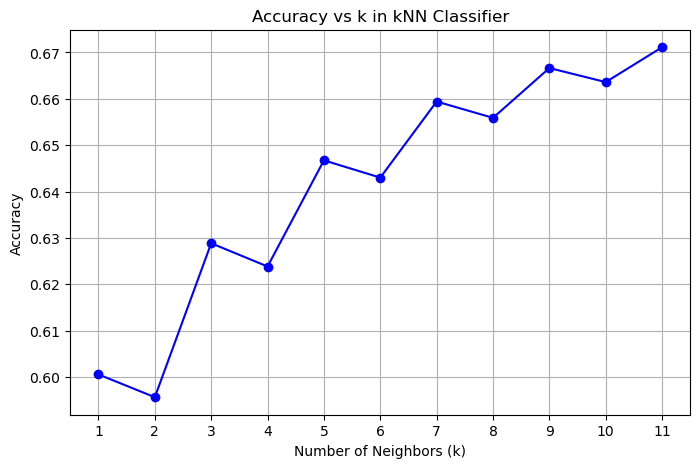

In [10]:
#A8. Make k = 1 to implement NN classifier and compare the results with kNN (k = 3). Vary k from 1 to 
#11 and make an accuracy plot. 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Store accuracy for different k values
accuracies = []

# Vary k from 1 to 11
for k in range(1, 12):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    acc = neigh.score(X_test, y_test)
    accuracies.append(acc)
    print(f"k = {k}, Accuracy = {acc:.4f}")

# Plot accuracy vs k
plt.figure(figsize=(8, 5))
plt.plot(range(1, 12), accuracies, marker='o', linestyle='-', color='b')
plt.title("Accuracy vs k in kNN Classifier")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(range(1, 12))
plt.grid(True)
plt.show()




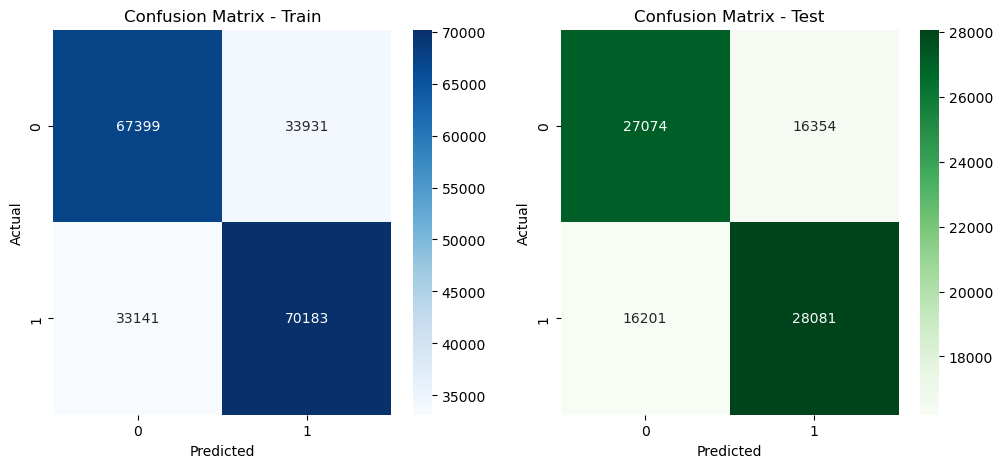

Train Classification Report:

              precision    recall  f1-score   support

           0       0.67      0.67      0.67    101330
           1       0.67      0.68      0.68    103324

    accuracy                           0.67    204654
   macro avg       0.67      0.67      0.67    204654
weighted avg       0.67      0.67      0.67    204654

Test Classification Report:

              precision    recall  f1-score   support

           0       0.63      0.62      0.62     43428
           1       0.63      0.63      0.63     44282

    accuracy                           0.63     87710
   macro avg       0.63      0.63      0.63     87710
weighted avg       0.63      0.63      0.63     87710

Training Accuracy: 0.6723
Testing Accuracy: 0.6288
Inference: Model may be Underfitting.


In [11]:
#A9. Please evaluate confusion matrix for your classification problem. From confusion matrix, the 
#other performance metrics such as precision, recall and F1-Score measures for both training and test 
#data. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit). 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Train a kNN classifier (you can set k=3 or any best value from your previous accuracy plot)
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predictions on train and test
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# --- Confusion Matrices ---
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("Confusion Matrix - Train")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")

sns.heatmap(cm_test, annot=True, fmt="d", cmap="Greens", ax=ax[1])
ax[1].set_title("Confusion Matrix - Test")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")

plt.show()

# --- Classification Report ---
print("Train Classification Report:\n")
print(classification_report(y_train, y_train_pred))

print("Test Classification Report:\n")
print(classification_report(y_test, y_test_pred))

# --- Accuracy Comparison ---
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

# --- Fit Evaluation ---
if train_acc > 0.95 and (train_acc - test_acc) > 0.1:
    print("Inference: Model may be Overfitting.")
elif train_acc < 0.7 and test_acc < 0.7:
    print("Inference: Model may be Underfitting.")
else:
    print("Inference: Model has a Regular Fit (good generalization).")
